In [1]:
%matplotlib inline
import random as rand
import numpy as np
import matplotlib.pyplot as plt
import math
import time

In [2]:
# Exercise 1.8

def nChoosek(n, k):
    return float(math.factorial(n))/(math.factorial(k)*math.factorial(n-k))
    
def binomDist(n, k, p):
    return nChoosek(n, k)*(p**(k))*(1-p)**(n-k)
    
# Probability of mu = 0.9, N=10, nu=.1
prob1 = binomDist(10, 1, 0.9)

# Probability of mu = 0.9, N=10, nu=0
prob0 = binomDist(10, 0, 0.9)
print(prob1 + prob0)

9.09999999999998e-09


In [3]:
# Exercise 1.9

# mu = 0.9, n = 10 nu <= 0.1

def hoeffdingInequality(n, eps):
    return 2*np.exp(-2*np.power(eps,2)*n )

print(hoeffdingInequality(10, .7))


0.000110903198864


In [4]:
# Exercise 1.10

def flipCoin():
    
    # Random variables    
    coinFlips = np.random.randint(2, size=(1000, 10))
    VrandInt = np.random.randint(1000)
    
    # First Coin
    firstCoin = np.sum(coinFlips[0])

    # Random Coin
    randomCoin = np.sum(coinFlips[VrandInt])
    
    # Min Coin
    coinFlipSums = coinFlips.sum(axis=1)
    lowestCoin = np.amin(coinFlipSums)
    return (firstCoin, randomCoin, lowestCoin)

In [5]:
def repeatExp(num, firstCoin, randCoin, minCoin):
    for x in range(0, num):
        results = flipCoin()
        firstCoin.append(results[0])
        randCoin.append(results[1])
        minCoin.append(results[2])
firstCoin = []
randCoin = [] 
minCoin = []

start = time.time()
repeatExp(100000, firstCoin, randCoin, minCoin)
end = time.time()
print(end - start)

43.29655933380127


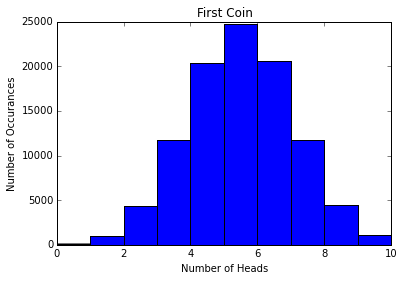

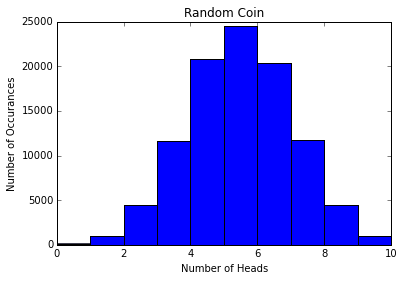

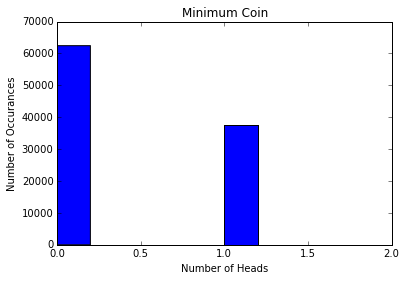

In [6]:
#
# histogram has the ability to plot multiple data in parallel ...
# Note the new color kwarg, used to override the default, which
# uses the line color cycle.
#

plt.hist(firstCoin)
plt.title('First Coin')
plt.xlabel('Number of Heads')
plt.ylabel('Number of Occurances')
plt.show()
plt.hist(randCoin)
plt.title('Random Coin')
plt.xlabel('Number of Heads')
plt.ylabel('Number of Occurances')
plt.show()
plt.hist(minCoin)
plt.title('Minimum Coin')
plt.xlabel('Number of Heads')
plt.ylabel('Number of Occurances')
plt.show()

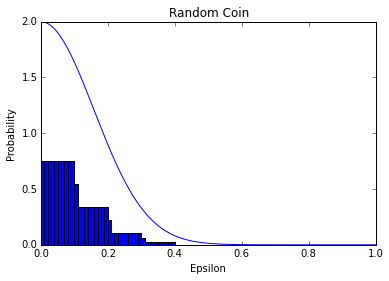

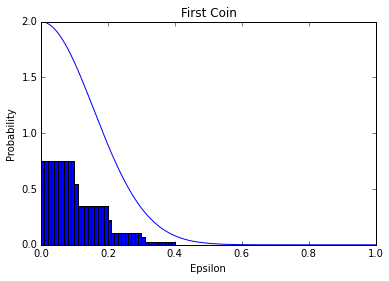

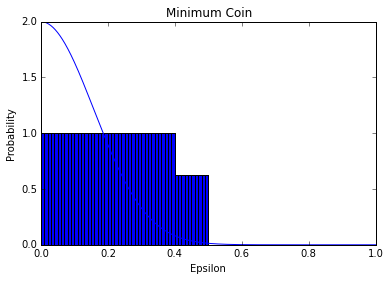

In [7]:
# Excersize 
# P[|v-m|>ep]
# 2e^(-2ep^(2)*N)
# N = 10
# m = 0.5

def plotEstimates(coins, epsilon):
    prob = 0
    for coin in range(0, len(coins)):
        if(np.absolute(coin*.1-.5)>(epsilon)):
            prob += coins[coin]
    return prob

def coinBound(coinsInput):
    coinCount = np.bincount(coinsInput)
    coins = []
    for coin in coinCount:
        coins.append(coin*.00001)

    x1 = []
    y1 = []
    for num in np.arange(0,.5, .01):
        ydot = plotEstimates(coins, num)
        x1.append(num)
        y1.append(ydot)

    N = 10
    points = 1000
    x = np.linspace(0, 1, points)
    y = []
    for index in x:
        yDot = 2*np.exp(-2*np.power(index,2)*N )
        y.append(yDot)
    return (x1, y1, x, y)

# Random Coin 
randCoinAns = coinBound(randCoin)
plt.bar(randCoinAns[0], randCoinAns[1], width = .01)    
plt.plot(randCoinAns[2], randCoinAns[3])
plt.xlabel("Epsilon")
plt.ylabel("Probability")
plt.title("Random Coin")
plt.show()

# First Coin
firstCoinAns = coinBound(firstCoin)
plt.bar(firstCoinAns[0], firstCoinAns[1], width = .01)    
plt.plot(firstCoinAns[2], firstCoinAns[3])
plt.xlabel("Epsilon")
plt.ylabel("Probability")
plt.title("First Coin")
plt.show()

# Min Coin
minCoinAns = coinBound(minCoin)
plt.bar(minCoinAns[0], minCoinAns[1], width = .01)    
plt.plot(minCoinAns[2], minCoinAns[3])
plt.xlabel("Epsilon")
plt.ylabel("Probability")
plt.title("Minimum Coin")
plt.show()

In [8]:
# problem 1-7
# a 

x = .2**10
x = 1-x
x = x**1000

def atLeastOneCoin(mu, coins):
    x = (1-mu)**10
    x = 1-x
    return x**coins

# mu = .05 coins: 1, 1000, 1000000

first1 = atLeastOneCoin(.05, 1)
first2 = atLeastOneCoin(.05, 1000)
first3 = atLeastOneCoin(.05, 1000000)
print (first1, first2, first3)
# mu = .8 coins: 1, 1000, 1000000

sec1 = atLeastOneCoin(.8, 1)
sec2 = atLeastOneCoin(.8, 1000)
sec3 = atLeastOneCoin(.8, 1000000)
print (sec1, sec2, sec3)


0.4012630607616213 0.0 0.0
0.9999998976 0.9998976052374238 0.9026684073168393


In [9]:
# problem 1-7
# 

# Random variables    
coinFlips = np.random.randint(2, size=(2, 6))

print coinFlips
# first Coin
firstCoin = np.sum(coinFlips[0])
secondCoin = np.sum(coinFlips[1])

coinCount = np.bincount(randCoin)

def plotEstimates(coins, epsilon):
    prob = 0
    for coin in range(0, 11):
        if(np.absolute(coin*.1-.5)>=(epsilon)):
            prob += coins[coin]
    return prob

x1 = []
y1 = []
for num in np.arange(0,.5, .01):
    ydot = plotEstimates(coins, num)
    x1.append(num)
    y1.append(ydot)

N = 10
points = 1000
x = np.linspace(0, 1, points)
y = []
for index in x:
    yDot = 2*np.exp(-2*np.power(index,2)*N )
    y.append(yDot)



SyntaxError: Missing parentheses in call to 'print' (<ipython-input-9-e30b89f81b11>, line 7)

In [ ]:
# problem 1-7
# b 

N = 6
mu = 0.5
binoms = []
probs = [0]*10
xPoints = []

def nChoosek(n, k):
    return float(math.factorial(n))/(math.factorial(k)*math.factorial(n-k))
    
def binomDist(n, k, p):
    return nChoosek(n, k)*(p**(k))*(1-p)**(n-k)

def hoeffdingInequality(n, eps):
    return 2*np.exp(-2*np.power(eps,2)*n )

for index in range(0,N):
    binoms.append(binomDist(N, index, mu))

    
for index in np.arange(0,1, .1):
    xPoints.append(index)
    for bino in range(0,len(binoms)):
        if np.absolute(bino/6.0 - 0.5) > index:
            probs[int(index*10)] += binoms[bino]

for index in range(0,N):
     probs[index] = 2*probs[index] - probs[index]**2
#      probs[index] = 2*probs[index] - probs[index]**2

print(binoms)
print(probs)

x = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

plt.step(xPoints, probs, label='Coins')

plt.xlabel("Epsilon")
plt.ylabel("Probability")
plt.title("Two coins")

hoeffx = []
hoeffy = []

for index in np.arange(0,1,.01):
    hoeffx.append(index)
    hoeff = 2*np.exp(-2*np.power(index,2)*6 )
    hoeffy.append(2*hoeff-hoeff**2)

plt.plot(hoeffx, hoeffy, label='Hoeffding')
plt.show()
    
        



In [ ]:
hahahhhh

In [ ]:
id iw towking

In [ ]:
hello
how si ti
I think that it may be working
a little un responsive
Not too base though